In [1]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data, parse the dates, and set the index
df = pd.read_csv('../stress_partitioning/mobile_shear_velocity_2023.csv', parse_dates=['Date_Time'], index_col='Date_Time')
#df['ustar'] = df['ustar']/10
# separate by season
spring = df['2023-03-01':'2023-06-21']
summer = df['2023-06-22':'2023-09-21']


#### Lower Limit for each grain size class (ISSS nomenclature)

Calculations

In [2]:
# create copies of the slices 
spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()
# make index a datetime object
spring.index = pd.to_datetime(spring.index)
summer.index = pd.to_datetime(summer.index)

# spring u*/ws values (settling velocities)
spring.loc[:, 'CS'] = df['u*'] / 0.0176060885613998
spring.loc[:, 'FS'] = df['u*'] / 0.000338022019880977
spring.loc[:, 'S'] = df['u*'] / 0.00000183
spring.loc[:, 'C'] = df['u*'] / 0.00000004

# summer u*/ws values (settling velocities)
summer.loc[:, 'CS'] = df['u*'] / 0.0198927554145328
summer.loc[:, 'FS'] = df['u*'] / 0.000400239457360187
summer.loc[:, 'S'] = df['u*'] / 0.00000220
summer.loc[:, 'C'] = df['u*'] / 0.00000004


Spring Plot

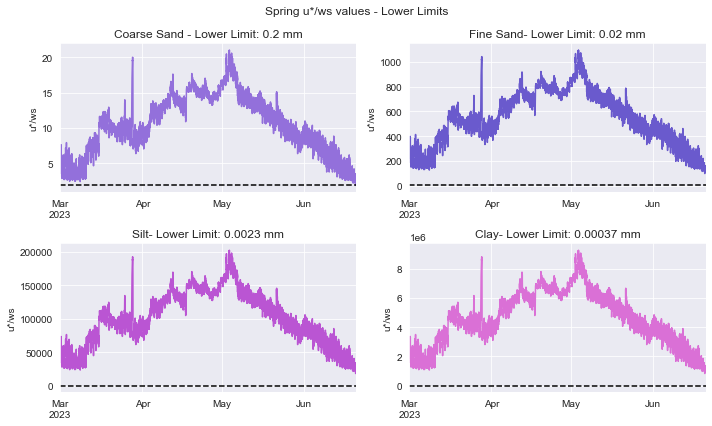

In [3]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
spring['CS'].plot(ax=ax[0,0],color='mediumpurple')
spring['FS'].plot(ax=ax[0,1],color='slateblue')
spring['S'].plot(ax=ax[1,0], color='mediumorchid')
spring['C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Lower Limit: 0.2 mm')
ax[0,1].set_title('Fine Sand- Lower Limit: 0.02 mm')
ax[1,0].set_title('Silt- Lower Limit: 0.0023 mm')
ax[1,1].set_title('Clay- Lower Limit: 0.00037 mm')

ax[0,0].set_ylabel('u*/ws')
ax[0,1].set_ylabel('u*/ws')
ax[1,0].set_ylabel('u*/ws')
ax[1,1].set_ylabel('u*/ws')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=2, color='k', linestyle='--')

plt.suptitle('Spring u*/ws values - Lower Limits')
plt.tight_layout()
plt.show()

Summer Plot

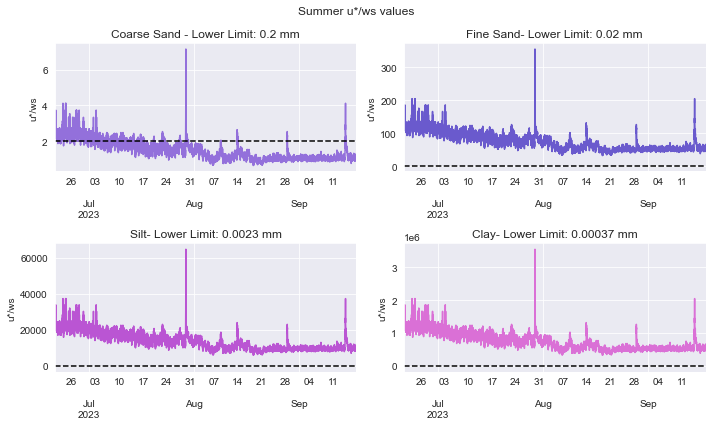

In [4]:
# plot for summer u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
summer['CS'].plot(ax=ax[0,0],color='mediumpurple')
summer['FS'].plot(ax=ax[0,1],color='slateblue')
summer['S'].plot(ax=ax[1,0], color='mediumorchid')
summer['C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Lower Limit: 0.2 mm')
ax[0,1].set_title('Fine Sand- Lower Limit: 0.02 mm')
ax[1,0].set_title('Silt- Lower Limit: 0.0023 mm')
ax[1,1].set_title('Clay- Lower Limit: 0.00037 mm')

ax[0,0].set_ylabel('u*/ws')
ax[0,1].set_ylabel('u*/ws')
ax[1,0].set_ylabel('u*/ws')
ax[1,1].set_ylabel('u*/ws')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=2, color='k', linestyle='--')

plt.suptitle('Summer u*/ws values')
plt.tight_layout()
plt.show()

Rouse Number Calculation

In [5]:
# spring u*/ws values (settling velocities)
spring.loc[:, 'P_CS'] = 0.0176060885613998 / (df['u*'] * 0.41)
spring.loc[:, 'P_FS'] = 0.000338022019880977 / (df['u*'] * 0.41)
spring.loc[:, 'P_S'] = 0.00000183 / (df['u*'] * 0.41)
spring.loc[:, 'P_C'] = 0.00000004 / (df['u*'] * 0.41)

# summer u*/ws values (settling velocities)
summer.loc[:, 'P_CS'] = 0.0198927554145328 / (df['u*'] * 0.41)
summer.loc[:, 'P_FS'] = 0.000400239457360187 / (df['u*'] * 0.41)
summer.loc[:, 'P_S'] = 0.00000220 / (df['u*'] * 0.41)
summer.loc[:, 'P_C'] = 0.00000004 / (df['u*'] * 0.41)

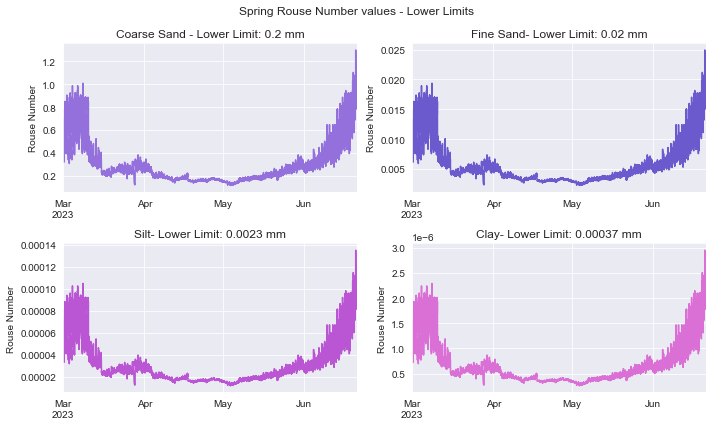

In [6]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
spring['P_CS'].plot(ax=ax[0,0],color='mediumpurple')
spring['P_FS'].plot(ax=ax[0,1],color='slateblue')
spring['P_S'].plot(ax=ax[1,0], color='mediumorchid')
spring['P_C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Lower Limit: 0.2 mm')
ax[0,1].set_title('Fine Sand- Lower Limit: 0.02 mm')
ax[1,0].set_title('Silt- Lower Limit: 0.0023 mm')
ax[1,1].set_title('Clay- Lower Limit: 0.00037 mm')

ax[0,0].set_ylabel('Rouse Number')
ax[0,1].set_ylabel('Rouse Number')
ax[1,0].set_ylabel('Rouse Number')
ax[1,1].set_ylabel('Rouse Number')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
#for i in ax:
#    for j in i:
#        j.axhline(y=0.8, color='k', linestyle='--')

plt.suptitle('Spring Rouse Number values - Lower Limits')
plt.tight_layout()
plt.show()

#### Upper Limit for each grain size class

Calculations

In [7]:
# create copies of the slices 
spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()
# make index a datetime object
spring.index = pd.to_datetime(spring.index)
summer.index = pd.to_datetime(summer.index)

# spring u*/ws values (settling velocities)
spring.loc[:, 'CS'] = df['u*'] / 0.218941382723314
spring.loc[:, 'FS'] = df['u*'] / 0.0136117665422671
spring.loc[:, 'S'] = df['u*'] / 0.000238055129431319
spring.loc[:, 'C'] = df['u*'] / 1.25198013242929E-06

# summer u*/ws values (settling velocities)
summer.loc[:, 'CS'] = df['u*'] / 0.229282017019633
summer.loc[:, 'FS'] = df['u*'] / 0.0154440103449761
summer.loc[:, 'S'] = df['u*'] / 0.000282620289859073
summer.loc[:, 'C'] = df['u*'] / 1.50508563580226E-06

Spring Plot

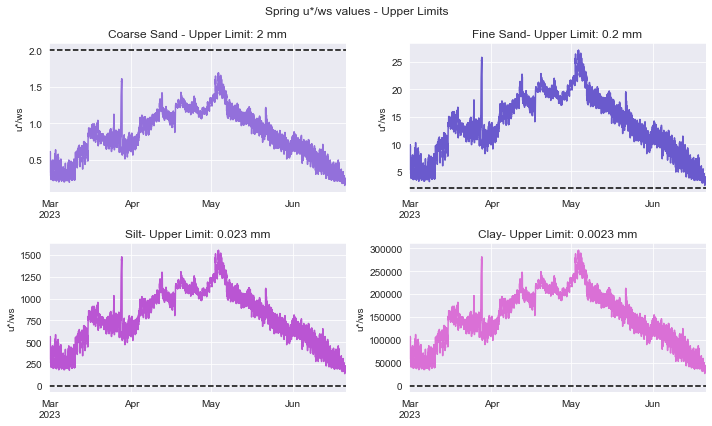

In [8]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
spring['CS'].plot(ax=ax[0,0],color='mediumpurple')
spring['FS'].plot(ax=ax[0,1],color='slateblue')
spring['S'].plot(ax=ax[1,0], color='mediumorchid')
spring['C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Upper Limit: 2 mm')
ax[0,1].set_title('Fine Sand- Upper Limit: 0.2 mm')
ax[1,0].set_title('Silt- Upper Limit: 0.023 mm')
ax[1,1].set_title('Clay- Upper Limit: 0.0023 mm')

ax[0,0].set_ylabel('u*/ws')
ax[0,1].set_ylabel('u*/ws')
ax[1,0].set_ylabel('u*/ws')
ax[1,1].set_ylabel('u*/ws')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=2, color='k', linestyle='--')

plt.suptitle('Spring u*/ws values - Upper Limits')
plt.tight_layout()
plt.show()

Summer Plot

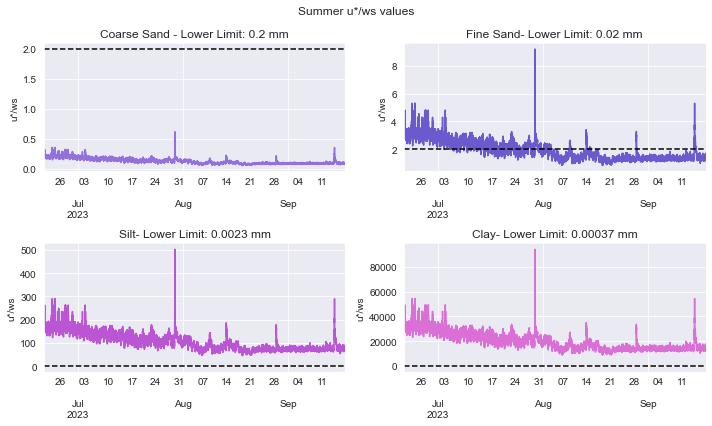

In [9]:
# plot for summer u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
summer['CS'].plot(ax=ax[0,0],color='mediumpurple')
summer['FS'].plot(ax=ax[0,1],color='slateblue')
summer['S'].plot(ax=ax[1,0], color='mediumorchid')
summer['C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Lower Limit: 0.2 mm')
ax[0,1].set_title('Fine Sand- Lower Limit: 0.02 mm')
ax[1,0].set_title('Silt- Lower Limit: 0.0023 mm')
ax[1,1].set_title('Clay- Lower Limit: 0.00037 mm')

ax[0,0].set_ylabel('u*/ws')
ax[0,1].set_ylabel('u*/ws')
ax[1,0].set_ylabel('u*/ws')
ax[1,1].set_ylabel('u*/ws')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=2, color='k', linestyle='--')

plt.suptitle('Summer u*/ws values')
plt.tight_layout()
plt.show()

Rouse Number Calculation

In [10]:
# spring u*/ws values (settling velocities)
spring.loc[:, 'P_CS'] = 0.218941382723314 / (df['u*'] * 0.41)
spring.loc[:, 'P_FS'] = 0.0136117665422671 / (df['u*'] * 0.41)
spring.loc[:, 'P_S'] = 0.000238055129431319 / (df['u*'] * 0.41)
spring.loc[:, 'P_C'] = 1.25198013242929E-06 / (df['u*'] * 0.41)

# summer u*/ws values (settling velocities)
summer.loc[:, 'P_CS'] = 0.229282017019633 / (df['u*'] * 0.41)
summer.loc[:, 'P_FS'] = 0.0154440103449761 / (df['u*'] * 0.41)
summer.loc[:, 'P_S'] = 0.000282620289859073 / (df['u*'] * 0.41)
summer.loc[:, 'P_C'] = 1.50508563580226E-06 / (df['u*'] * 0.41)

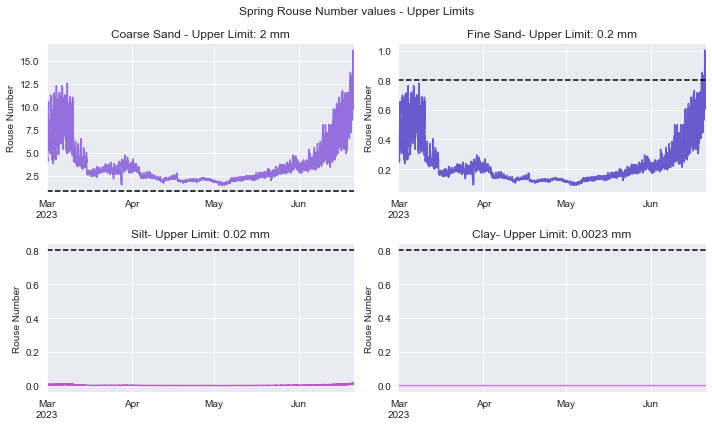

In [11]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
spring['P_CS'].plot(ax=ax[0,0],color='mediumpurple')
spring['P_FS'].plot(ax=ax[0,1],color='slateblue')
spring['P_S'].plot(ax=ax[1,0], color='mediumorchid')
spring['P_C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Upper Limit: 2 mm')
ax[0,1].set_title('Fine Sand- Upper Limit: 0.2 mm')
ax[1,0].set_title('Silt- Upper Limit: 0.02 mm')
ax[1,1].set_title('Clay- Upper Limit: 0.0023 mm')

ax[0,0].set_ylabel('Rouse Number')
ax[0,1].set_ylabel('Rouse Number')
ax[1,0].set_ylabel('Rouse Number')
ax[1,1].set_ylabel('Rouse Number')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=0.8, color='k', linestyle='--')

plt.suptitle('Spring Rouse Number values - Upper Limits')
plt.tight_layout()
plt.show()

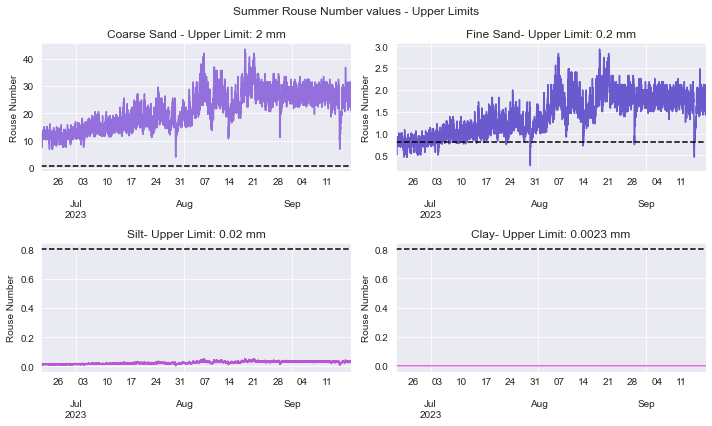

In [12]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(10,6))
summer['P_CS'].plot(ax=ax[0,0],color='mediumpurple')
summer['P_FS'].plot(ax=ax[0,1],color='slateblue')
summer['P_S'].plot(ax=ax[1,0], color='mediumorchid')
summer['P_C'].plot(ax=ax[1,1], color='orchid')
ax[0,0].set_title('Coarse Sand - Upper Limit: 2 mm')
ax[0,1].set_title('Fine Sand- Upper Limit: 0.2 mm')
ax[1,0].set_title('Silt- Upper Limit: 0.02 mm')
ax[1,1].set_title('Clay- Upper Limit: 0.0023 mm')

ax[0,0].set_ylabel('Rouse Number')
ax[0,1].set_ylabel('Rouse Number')
ax[1,0].set_ylabel('Rouse Number')
ax[1,1].set_ylabel('Rouse Number')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')

# in each subplot, add a dottet horizontal line at y=1
for i in ax:
    for j in i:
        j.axhline(y=0.8, color='k', linestyle='--')

plt.suptitle('Summer Rouse Number values - Upper Limits')
plt.tight_layout()
plt.show()

### Ranges of coarse sand

Calculations 

In [13]:
# create copies of the slices 
CS_spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
CS_summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()

# spring u*/ws values (settling velocities)
spring.loc[:, '200'] = df['u*'] / 0.01761
spring.loc[:, '240'] = df['u*'] / 0.02258
spring.loc[:, '280'] = df['u*'] / 0.02870
spring.loc[:, '330'] = df['u*'] / 0.03616
spring.loc[:, '390'] = df['u*'] / 0.04513
spring.loc[:, '460'] = df['u*'] / 0.05581
spring.loc[:, '500'] = df['u*'] / 0.06183
spring.loc[:, '700'] = df['u*'] / 0.09129
spring.loc[:, '1 mm'] = df['u*'] / 0.13080
spring.loc[:, '2 mm'] = df['u*'] / 0.21894

# summer u*/ws values (settling velocities)
summer.loc[:, '200'] = df['u*'] / 0.01989
summer.loc[:, '240'] = df['u*'] / 0.02540
summer.loc[:, '280'] = df['u*'] / 0.03215
summer.loc[:, '330'] = df['u*'] / 0.04032
summer.loc[:, '390'] = df['u*'] / 0.05011
summer.loc[:, '460'] = df['u*'] / 0.06167
summer.loc[:, '500'] = df['u*'] / 0.06815
summer.loc[:, '700'] = df['u*'] / 0.09952
summer.loc[:, '1 mm'] = df['u*'] / 0.14065
summer.loc[:, '2 mm'] = df['u*'] / 0.22928


Spring Plot

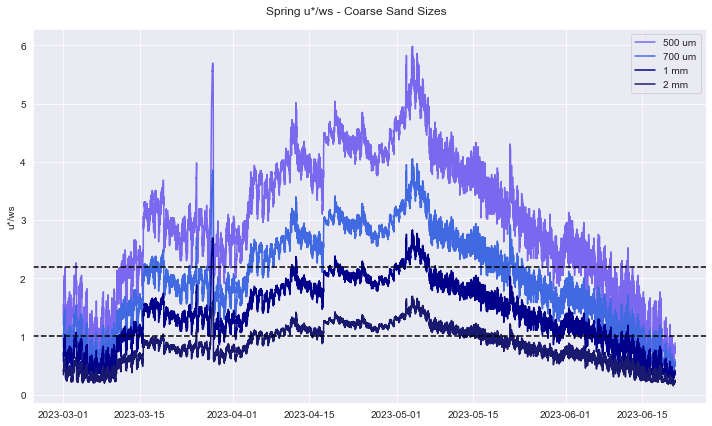

In [14]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
#plt.plot(spring['200'], color='orchid', label='200 um')
#plt.plot(spring['330'], color='mediumpurple', label='330 um')
plt.plot(spring['500'], color='mediumslateblue', label='500 um')
plt.plot(spring['700'], color='royalblue', label='700 um')
plt.plot(spring['1 mm'], color='darkblue', label='1 mm')
plt.plot(spring['2 mm'], color='midnightblue', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2.2, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Spring u*/ws - Coarse Sand Sizes')
plt.tight_layout()
plt.show()

Summer Plot

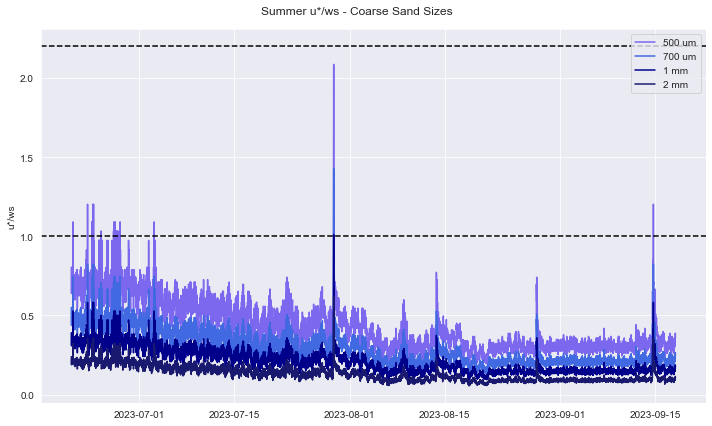

In [15]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
#plt.plot(summer['200'], color='orchid', label='200 um')
#plt.plot(summer['330'], color='mediumpurple', label='330 um')
plt.plot(summer['500'], color='mediumslateblue', label='500 um')
plt.plot(summer['700'], color='royalblue', label='700 um')
plt.plot(summer['1 mm'], color='darkblue', label='1 mm')
plt.plot(summer['2 mm'], color='midnightblue', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=2.2, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Summer u*/ws - Coarse Sand Sizes')
plt.tight_layout()
plt.show()

### Dade and Friend (1998)

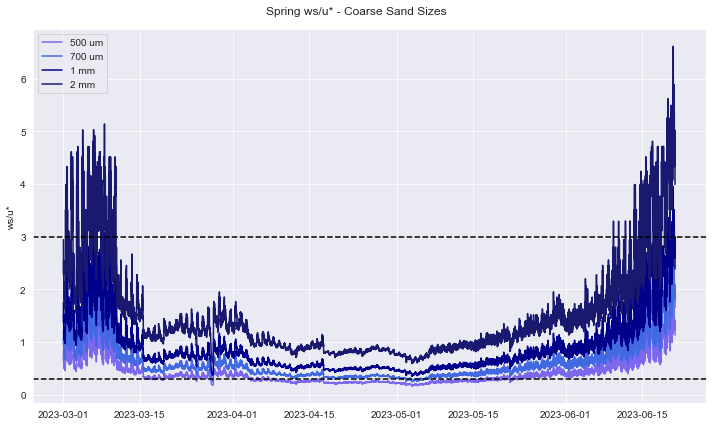

In [16]:
# create copies of the slices 
CS_spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
CS_summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()

# spring u*/ws values (settling velocities)
spring.loc[:, '200'] = 0.01761 / df['u*']
spring.loc[:, '240'] = 0.02258 / df['u*']
spring.loc[:, '280'] = 0.02870 / df['u*']
spring.loc[:, '330'] = 0.03616 / df['u*']
spring.loc[:, '390'] = 0.04513 / df['u*']
spring.loc[:, '460'] = 0.05581 / df['u*']
spring.loc[:, '500'] = 0.06183 / df['u*']
spring.loc[:, '700'] = 0.09129 / df['u*']
spring.loc[:, '1 mm'] = 0.13080 / df['u*']
spring.loc[:, '2 mm'] = 0.21894 / df['u*']

# summer u*/ws values (settling velocities)
summer.loc[:, '200'] = 0.01989 / df['u*']
summer.loc[:, '240'] = 0.02540 / df['u*']
summer.loc[:, '280'] = 0.03215 / df['u*']
summer.loc[:, '330'] = 0.04032 / df['u*']
summer.loc[:, '390'] = 0.05011 / df['u*']
summer.loc[:, '460'] = 0.06167 / df['u*']
summer.loc[:, '500'] = 0.06815 / df['u*']
summer.loc[:, '700'] = 0.09952 / df['u*']
summer.loc[:, '1 mm'] = 0.14065 / df['u*']
summer.loc[:, '2 mm'] = 0.22928 / df['u*']

# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
#plt.plot(spring['200'], color='orchid', label='200 um')
#plt.plot(spring['330'], color='mediumpurple', label='330 um')
plt.plot(spring['500'], color='mediumslateblue', label='500 um')
plt.plot(spring['700'], color='royalblue', label='700 um')
plt.plot(spring['1 mm'], color='darkblue', label='1 mm')
plt.plot(spring['2 mm'], color='midnightblue', label='2 mm')

plt.axhline(y=0.3, color='k', linestyle='--')
plt.axhline(y=3, color='k', linestyle='--')

plt.ylabel('ws/u*')
plt.xlabel('')
plt.legend()
plt.suptitle('Spring ws/u* - Coarse Sand Sizes')
plt.tight_layout()
plt.show()

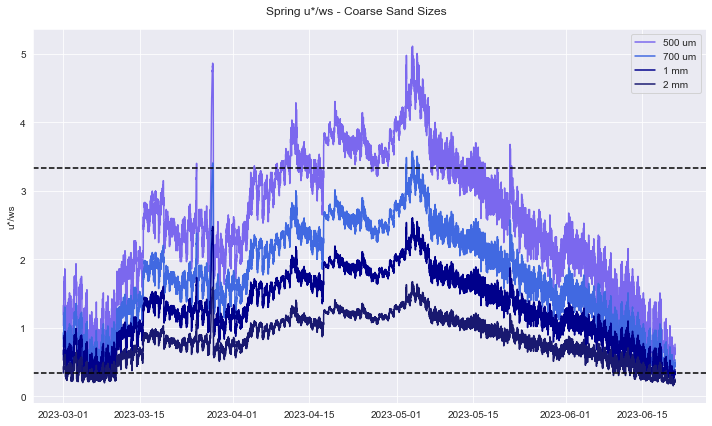

In [26]:
# create copies of the slices 
CS_spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
CS_summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()

# spring u*/ws values (settling velocities)
spring.loc[:, '200'] = df['u*'] / 0.02219
spring.loc[:, '240'] = df['u*'] / 0.02870
spring.loc[:, '280'] = df['u*'] / 0.03526
spring.loc[:, '330'] = df['u*'] / 0.04385
spring.loc[:, '390'] = df['u*'] / 0.05400
spring.loc[:, '460'] = df['u*'] / 0.06583
spring.loc[:, '500'] = df['u*'] / 0.07240
spring.loc[:, '700'] = df['u*'] / 0.10340
spring.loc[:, '1 mm'] = df['u*'] / 0.14211
spring.loc[:, '2 mm'] = df['u*'] / 0.22138

# summer u*/ws values (settling velocities)
summer.loc[:, '200'] = df['u*'] / 0.02219
summer.loc[:, '240'] = df['u*'] / 0.02870
summer.loc[:, '280'] = df['u*'] / 0.03526
summer.loc[:, '330'] = df['u*'] / 0.04385
summer.loc[:, '390'] = df['u*'] / 0.05400
summer.loc[:, '460'] = df['u*'] / 0.06583
summer.loc[:, '500'] = df['u*'] / 0.07240
summer.loc[:, '700'] = df['u*'] / 0.10340
summer.loc[:, '1 mm'] = df['u*'] / 0.14211
summer.loc[:, '2 mm'] = df['u*'] / 0.22138

# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
#plt.plot(spring['200'], color='orchid', label='200 um')
#plt.plot(spring['330'], color='mediumpurple', label='330 um')
plt.plot(spring['500'], color='mediumslateblue', label='500 um')
plt.plot(spring['700'], color='royalblue', label='700 um')
plt.plot(spring['1 mm'], color='darkblue', label='1 mm')
plt.plot(spring['2 mm'], color='midnightblue', label='2 mm')

plt.axhline(y=0.333, color='k', linestyle='--')
plt.axhline(y=3.333, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Spring u*/ws - Coarse Sand Sizes')
plt.tight_layout()
plt.show()

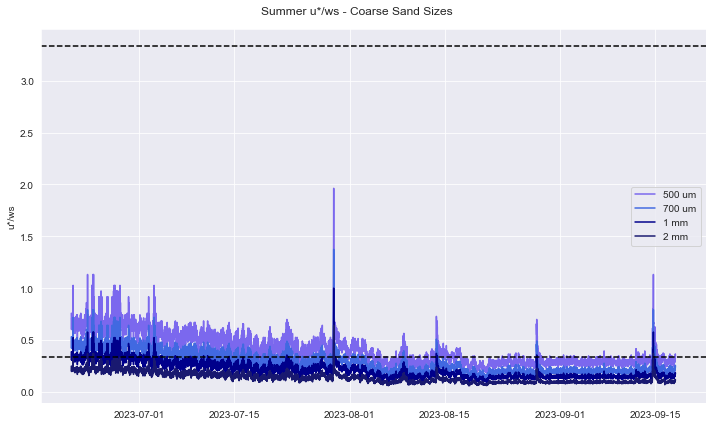

In [27]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
#plt.plot(summer['200'], color='orchid', label='200 um')
#plt.plot(summer['330'], color='mediumpurple', label='330 um')
plt.plot(summer['500'], color='mediumslateblue', label='500 um')
plt.plot(summer['700'], color='royalblue', label='700 um')
plt.plot(summer['1 mm'], color='darkblue', label='1 mm')
plt.plot(summer['2 mm'], color='midnightblue', label='2 mm')

plt.axhline(y=0.333, color='k', linestyle='--')
plt.axhline(y=3.333, color='k', linestyle='--')

plt.ylabel('u*/ws')
plt.xlabel('')
plt.legend()
plt.suptitle('Summer u*/ws - Coarse Sand Sizes')
plt.tight_layout()
plt.show()

### Bose and Dey (2013)

In [ ]:
# import csv with the probability of each size
probability = pd.read_csv('suspension_probability.csv', parse_dates=['Date_Time'], index_col='Date_Time')